In [1]:
from nltk.tokenize import word_tokenize
import pandas as pd 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from PIL import Image
import numpy as np

In [2]:
def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

In [3]:
def process_remove_punctuation_tokenize(text):
    text = remove_html(text)
    output = []
    for word in word_tokenize(text.lower()):
        if word.isalpha():
            output.append(word)
    return " ".join(output)

In [4]:
reviews = pd.read_csv('../IMDB_dataset/IMDB dataset.csv')['review'][0:10]

In [5]:
reviews

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
5    Probably my all-time favorite movie, a story o...
6    I sure would like to see a resurrection of a u...
7    This show was an amazing, fresh & innovative i...
8    Encouraged by the positive comments about this...
9    If you like original gut wrenching laughter yo...
Name: review, dtype: object

In [6]:
reviews = reviews.apply(process_remove_punctuation_tokenize)

In [7]:
reviews

0    one of the other reviewers has mentioned that ...
1    a wonderful little production the filming tech...
2    i thought this was a wonderful way to spend ti...
3    basically there a family where a little boy ja...
4    petter mattei love in the time of money is a v...
5    probably my favorite movie a story of selfless...
6    i sure would like to see a resurrection of a u...
7    this show was an amazing fresh innovative idea...
8    encouraged by the positive comments about this...
9    if you like original gut wrenching laughter yo...
Name: review, dtype: object

In [8]:
def join_texts(texts):
    return " ".join(texts)

In [9]:
wc_text = join_texts(reviews)

In [10]:
mask = np.array(Image.open("cloud_mask.png"))

In [11]:
wc = WordCloud(mask=mask,background_color='white', contour_color='#023075',contour_width=1).generate(wc_text)

(-0.5, 1499.5, 1061.5, -0.5)

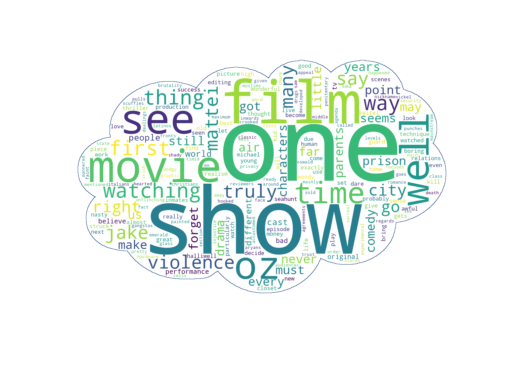

In [12]:
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

In [13]:
wc.to_file('wordCloud.png')